# 01. PyTorch Computer Vision Exercises

In [ ]:
# Check for GPU
!nvidia-smi

Wed Dec 27 10:14:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from platform import python_version
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu121


'cuda'

## 0. "ways to prevent overfitting in machine learning"
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning

3 ways to prevent overfitting:

1. Regularization techniques - You could use dropout on your neural networks, dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.

2. Use a different model - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use transfer learning (taking the patterns from one model and applying them to your own problem).

3. Reduce noise in data/cleanup dataset/introduce data augmentation techniques - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 1. [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 2. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [ ]:
train_data_raw = datasets.MNIST(root='.',
                            train = True,
                            transform=transforms.ToTensor(),
                            download=True)

test_data = datasets.MNIST(root='.',
                           train = False,
                           transform=transforms.ToTensor(),
                           download=True)
# Returns:(image, target) where target is index of the target class.

In [ ]:
train_data_raw, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
img, label = train_data_raw[0]
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")


Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [ ]:
# print(f'image:{img}')
# print(f'label:{label}')

In [ ]:
# Get the class/label names from the dataset
label_names = train_data_raw.classes
label_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 3. Visualize at least 5 different samples of the MNIST training dataset.

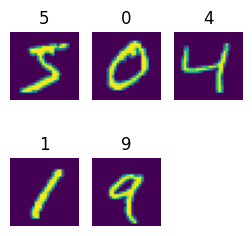

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
for i in range(5):
  image = train_data_raw[i][0]
  label = train_data_raw[i][1]
  plt.subplot(2,3,i+1)
  plt.imshow(image.squeeze())
  plt.title(label)
  plt.axis(False)

## 4. Turn the MNIST train valide and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

train_len = int(len(train_data_raw)*0.8)
vaid_len = len(train_data_raw) - train_len
print(train_len,vaid_len)

torch.manual_seed(42)
train_data, valid_data = random_split(dataset=train_data_raw,
                                      lengths=[train_len,vaid_len])

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle=True)

valid_dataloader = DataLoader(dataset = valid_data,
                              batch_size = 32,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 32,
                              shuffle=True)

48000 12000


In [ ]:
len(train_dataloader),len(valid_dataloader),len(test_dataloader)

(1500, 375, 313)

In [ ]:
print(int(len(train_dataloader)) == int(train_len/32))

True


In [ ]:
# next(iter(valid_dataloader))

In [ ]:
# torch.manual_seed(42)
# for sample in next(iter(train_dataloader)):
#   print(sample)

In [ ]:
len(valid_dataloader)

375

In [ ]:
# for batch, (X,y) in enumerate(valid_dataloader):
#   print(len(X),len(y))
#   print(X,y,batch)

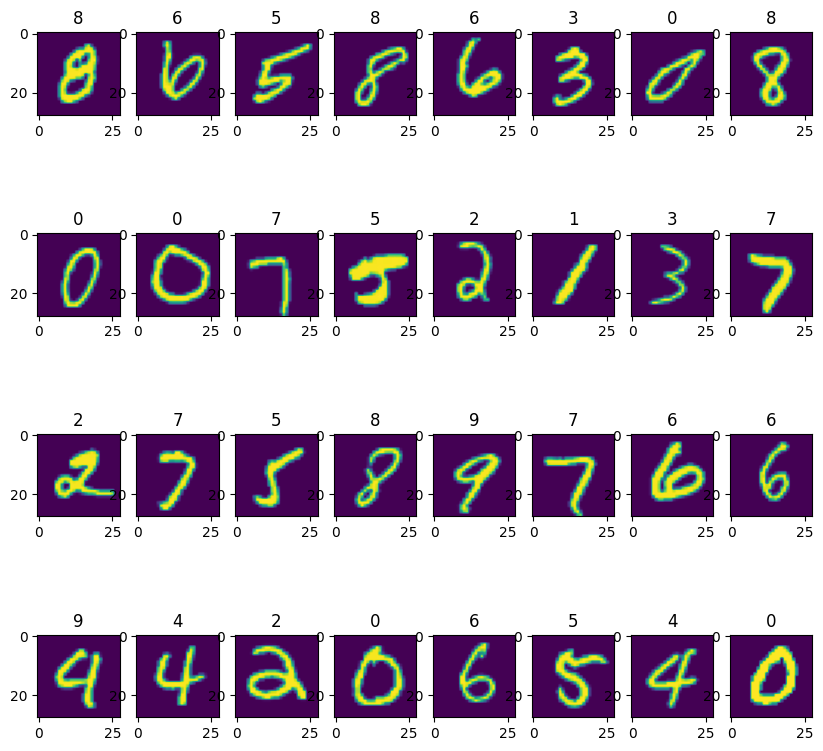

In [ ]:
torch.manual_seed(42)
plt.figure(figsize=(10, 10))
sample = next(iter(train_dataloader))
for i in range(len(sample[0])):
  # if i < 2:
    plt.subplot(4,8,i+1)
    plt.imshow(sample[0][i].squeeze())
    plt.title(sample[1][i].item())
  # else: break;

torch.Size([1, 28, 28])
784


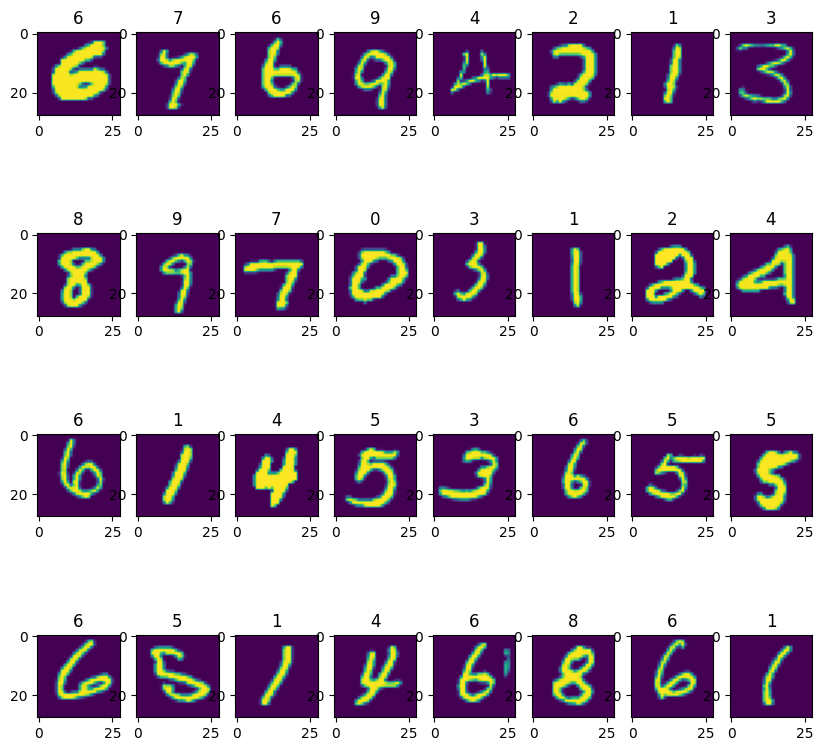

In [ ]:
torch.manual_seed(42)
plt.figure(figsize=(10, 10))
for batch,(X,y) in enumerate(train_data):
  if batch < 32:
    # print(X.shape)
    plt.subplot(4,8,batch+1)
    plt.imshow(X.squeeze())
    plt.title(y)
  else:
    print(X.size())
    print(torch.numel(X))
    break;

## 5. Create model (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from typing import Tuple
import torch.nn as nn

class MNISTConv2d(nn.Module):
  def __init__(self,in_channel:int,hidden_units:int,out_features:int,
               kernel_size:int or Tuple,filter_stride:int,padding:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channel,
                  out_channels=hidden_units,
                  kernel_size=kernel_size,
                  stride=filter_stride,
                  padding=padding),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=kernel_size,
                  stride=filter_stride,
                  padding=padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
        )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=kernel_size,
                  stride=filter_stride,
                  padding=padding),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=kernel_size,
                  stride=filter_stride,
                  padding=padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=1)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*18*18,
                  out_features=out_features)
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    #x.size()[1:].numel()=3240
    #x = x.view(x.size()[1:].numel())
    # print(x.size())
    x = self.classifier(x)

    return x


In [ ]:
torch.manual_seed(42)
a = torch.randn(2, 2, 2, 2)
b = a.numel()
print(f'a :{a}')
print(f'torch.numel(a): {b}')

c = a.view(torch.numel(a))
print(f'a.view(a.numel){c}')

a :tensor([[[[ 1.9269,  1.4873],
          [ 0.9007, -2.1055]],

         [[ 0.6784, -1.2345],
          [-0.0431, -1.6047]]],


        [[[-0.7521,  1.6487],
          [-0.3925, -1.4036]],

         [[-0.7279, -0.5594],
          [-0.7688,  0.7624]]]])
torch.numel(a): 16
a.view(a.numel)tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
        -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624])


In [ ]:
model_0 = MNISTConv2d(in_channel=1,
                      hidden_units=10,
                      out_features=10,
                      kernel_size=3,
                      filter_stride=1,padding=0)
model_0

MNISTConv2d(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3240, out_features=10, bias=True)
  )
)

## 6. Train the model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.01)

In [ ]:
!pip -q install torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task='multiclass', num_classes=10).to(device)

In [ ]:
def train_step(model:torch.nn.Module,
               train_dataloader:torch.utils.data.DataLoader,
               device:torch.device=None):
  epoch_loss=0
  epoch_acc=0

  for i, (X,y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    # forward pass
    train_preds = model_0(X)
    # if i == 5:
    #   print(train_preds)
    train_acc = acc_fn(train_preds.argmax(dim=1),y)
    epoch_acc += train_acc
    # calcute the loss
    train_loss = loss_fn(input=train_preds,
                         target=y)
    epoch_loss += train_loss
    # zero optimer
    optimizer.zero_grad()
    # backward
    train_loss.backward()
    #optimizer step
    optimizer.step()

    # average of train loss per batch per epoch
    # train_dataloader has 1500 batch, each batch has 32 [imag,label]
  avg_train_loss = epoch_loss/len(train_dataloader)
  avg_train_acc = epoch_acc/len(train_dataloader)
  print(f'average train loss and accuracy in epoch {epoch} by a batch: {avg_train_loss:.5f}|accuracy:{avg_train_acc:.5f}')


In [ ]:
def test_step(mode:str,
              model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              device:torch.device=None):
  model.to(device)
  model.eval()
  totle_loss=0
  totle_acc=0

  for i, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    with torch.inference_mode():
      preds = model(X)
      # if i == 5:
      #   print(preds)
      totle_loss += loss_fn(preds,y)
      totle_acc += acc_fn(preds.argmax(dim=1),y)

  avg_loss = totle_loss/len(dataloader)
  avg_acc = totle_acc/len(dataloader)
  print(f'average {mode} loss and accuracy per batch: {avg_loss:.5f}|accuracy:{avg_acc}')


In [ ]:
# train model
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

model_0.to(device)
model_0.train()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model_0,train_dataloader,device)

test_step('validation',model_0,valid_dataloader,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
average train loss and accuracy in epoch 0 by a batch: 0.29700|accuracy:0.91048
Epoch: 1
---------
average train loss and accuracy in epoch 1 by a batch: 0.15733|accuracy:0.95352
Epoch: 2
---------
average train loss and accuracy in epoch 2 by a batch: 0.14037|accuracy:0.95702
average validation loss and accuracy per batch: 0.15966|accuracy:0.9519999623298645


## 7. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
sample = next(iter(test_dataloader))
sample[1]

tensor([8, 8, 2, 7, 2, 0, 3, 2, 4, 8, 5, 4, 3, 5, 9, 8, 9, 4, 1, 1, 1, 3, 3, 3,
        7, 0, 3, 8, 3, 8, 6, 5])

In [ ]:
totle_loss=0
totle_acc=0

model_0.to(device)
model_0.eval()

for i, (X,y) in enumerate(test_dataloader):
  X, y = X.to(device), y.to(device)
  # print(X.size())
  with torch.inference_mode():
    pred = model_0(X)
    totle_loss += loss_fn(pred,y)
    totle_acc += acc_fn(pred.argmax(dim=1),y)

avg_acc = totle_acc/len(test_dataloader)
avg_loss = totle_loss/len(test_dataloader)
print(f'average test loss and accuracy per batch: {avg_loss:.5f}|accuracy:{avg_acc}')

average test loss and accuracy per batch: 0.13074|accuracy:0.9585662484169006


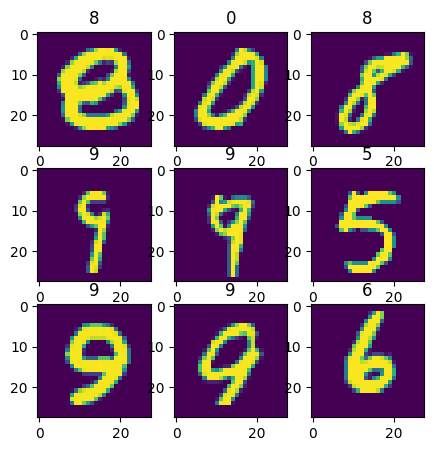

In [ ]:
# random sample 9 sample
import random
torch.manual_seed(42)
test_images=[]
test_labels=[]

for image, label in random.sample(list(test_data), k=9):
  # print(image.size())
  test_images.append(image)
  test_labels.append(label)

plt.figure(figsize=(5,5))
for i, image in enumerate(test_images):
  plt.subplot(3,3,i+1)
  plt.imshow(image.squeeze())
  plt.title(test_labels[i])


In [ ]:
# make prediction with the 9 sample aboves
model_0.eval()
pred_labels = []
with torch.inference_mode():
  # print(test_images[0].size())
  for sample in test_images:
    # conv2d model input shape [N,C,H,W]
    sample = torch.unsqueeze(sample,dim=0).to(device)
    pred_prob = model_0(sample)
    pred_label = pred_prob.argmax(dim=1)#是否加softmax？test_step就没加
    pred_labels.append(pred_label)

pred_labels

[tensor([8], device='cuda:0'),
 tensor([0], device='cuda:0'),
 tensor([8], device='cuda:0'),
 tensor([9], device='cuda:0'),
 tensor([9], device='cuda:0'),
 tensor([5], device='cuda:0'),
 tensor([9], device='cuda:0'),
 tensor([9], device='cuda:0'),
 tensor([6], device='cuda:0')]

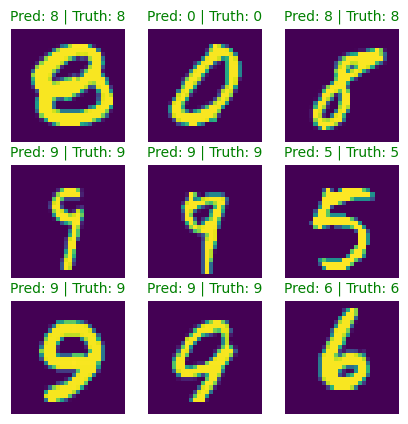

In [ ]:
plt.figure(figsize=(5,5))

for i, image in enumerate(test_images):
  plt.subplot(3,3,i+1)
  title_text = f"Pred: {pred_labels[i].item()} | Truth: {test_labels[i]}"
  plt.imshow(image.squeeze())
  if pred_labels[i] == test_labels[i]:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


## 8. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
    # print(X.shape)
    X,y=X.to(device),y.to(device)
    y_logit = model_0(X)
    y_pred = y_logit.argmax(dim=1)
    y_preds.append(y_pred.cpu())
print(y_preds[:5],len(y_preds))
y_preds_tensor = torch.cat(y_preds)
print(y_preds_tensor,y_preds_tensor.shape)

[tensor([9, 3, 0, 9, 5, 1, 4, 8, 0, 1, 1, 6, 2, 8, 9, 1, 7, 9, 6, 8, 4, 5, 7, 5,
        9, 2, 5, 3, 1, 0, 2, 0]), tensor([1, 5, 6, 3, 7, 1, 7, 2, 5, 2, 5, 0, 9, 8, 0, 7, 5, 2, 8, 7, 2, 0, 2, 7,
        1, 9, 4, 1, 6, 3, 7, 2]), tensor([4, 0, 8, 1, 2, 3, 3, 9, 1, 4, 5, 8, 0, 8, 4, 8, 2, 2, 6, 3, 7, 4, 9, 6,
        8, 1, 7, 2, 3, 4, 6, 7]), tensor([4, 3, 2, 5, 8, 7, 0, 3, 3, 3, 7, 9, 0, 1, 9, 2, 1, 0, 2, 1, 4, 7, 0, 3,
        1, 9, 4, 4, 5, 4, 0, 9]), tensor([0, 3, 6, 8, 7, 0, 3, 0, 3, 2, 5, 3, 1, 0, 3, 5, 5, 1, 4, 0, 0, 6, 9, 1,
        3, 8, 1, 6, 4, 2, 0, 1])] 313
tensor([9, 3, 0,  ..., 7, 2, 8]) torch.Size([10000])


In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


In [ ]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

10
tensor([[104, 104,  87, 113, 101,  77,  84, 100, 111,  99],
        [ 90, 140, 101, 129, 116,  83, 111, 118, 128, 119],
        [107, 128, 104, 111,  98,  90,  97, 119,  92,  86],
        [ 98, 117, 104, 101, 107,  88, 102,  97,  95, 101],
        [102, 114, 108, 108, 102,  88,  91,  94,  81,  94],
        [ 98, 113,  87,  94,  84,  69,  78,  85,  83, 101],
        [103,  97, 104,  92, 107,  79,  90, 102,  78, 106],
        [ 94, 126, 114, 102,  88,  98, 100,  97, 108, 101],
        [ 98, 120,  91, 119,  82,  86,  86,  97,  82, 113],
        [ 94, 125, 104, 108, 101,  90,  93, 105,  97,  92]])


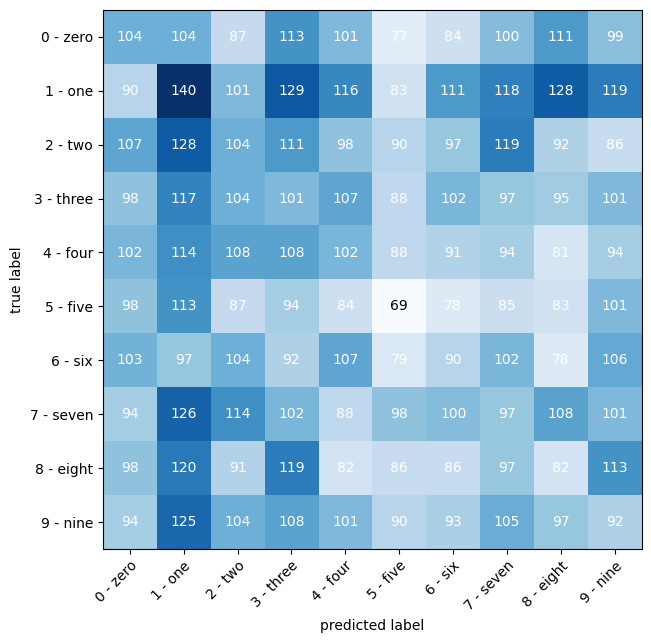

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(test_data.classes),
                          task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)
print(len(confmat_tensor))

# plot the confusion matrixconfmat_tensor
print(confmat_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=test_data.classes,
    figsize=(10,7)
);